<a href="https://colab.research.google.com/github/Fabkres/ArtificialIntelligence/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Implementação do Algoritmo k-means**



###Pseudocódigo

Algoritmo K-means:
1. Inicialize o número de clusters (k) e o número máximo de iterações.
2. Inicialize os centroides de forma aleatória.
3. Repita até que a convergência seja alcançada ou o número máximo de iterações seja atingido:
     4. Atribua cada ponto ao cluster cujo centroide é o mais próximo.
     5. Recalcule os centroides de cada cluster como a média dos pontos atribuídos a ele.
     6. Verifique se houve alteração nos centroides. Se não houve, a convergência foi alcançada e pare.
7. Retorne os clusters resultantes.

In [6]:
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

In [12]:
class KMeans:
    def __init__(self, k, max_iteracoes=100):
        self.k = k
        self.max_iteracoes = max_iteracoes
        self.centroides = None
        self.clusters = None
        

    def distancia_euclidiana(self, ponto1, ponto2):
        """Calcula a distância euclidiana entre dois pontos."""
        return math.sqrt(np.sum((np.array(ponto1) - np.array(ponto2)) ** 2))


    def inicializar_centroides(self, dados):

        """Inicializa os centroides aleatoriamente"""

        self.centroides = random.sample(dados, self.k)


    def atribuir_pontos_a_clusters(self, dados):

        """ O método atribuir_pontos_a_clusters itera sobre cada ponto do conjunto de dados, calcula 
          a distância para cada centroide e atribui o ponto ao cluster cujo centroide está mais próximo. 
          Ao final do método, a lista self.clusters terá os pontos agrupados corretamente nos clusters correspondentes."""

        self.clusters = [[] for _ in range(self.k)]
        for ponto in dados:
            distancias = [self.distancia_euclidiana(ponto, centroide) for centroide in self.centroides]
            cluster_atual = distancias.index(min(distancias))
            self.clusters[cluster_atual].append(ponto)


    def atualizar_centroides(self):

        """o método atualizar_centroides percorre cada cluster, calcula a média dos pontos do cluster para obter o novo centroide e atualiza o centroide do cluster. 
        Ao final, o método retorna True se os centroides não foram alterados ou False caso tenham ocorrido alterações. 
        Essa verificação é usada no método fit para determinar se o algoritmo convergiu (ou seja, os centroides não estão mais mudando) e encerrar o processo 
        de ajuste."""

        centroides_antigos = self.centroides.copy()
        for i, cluster in enumerate(self.clusters):
            novo_centroide = np.mean(cluster, axis=0) if cluster else self.centroides[i]
            self.centroides[i] = novo_centroide
        return np.array_equal(self.centroides, centroides_antigos)


    def fit(self, dados):
        """o método fit executa o algoritmo K-means no conjunto de dados fornecido, atualizando os centroides e atribuindo os pontos aos clusters 
        correspondentes em cada iteração. Ele continua a execução até que ocorra convergência (os centroides não mudem) ou atinja o número máximo 
        de iterações definido. A cada iteração, também gera um gráfico dos clusters para visualização."""

        dados = list(dados)
        self.inicializar_centroides(dados)
        count_iteration = 0
        for _ in range(self.max_iteracoes):
            self.atribuir_pontos_a_clusters(dados)
            convergiu = self.atualizar_centroides()
            count_iteration +=1
            if convergiu:
                print('Total de iterações até convergir',count_iteration)
                break
            self.plot_clusters()  # Gera o gráfico a cada iteração


    def plot_clusters(self): 
        "Plota o resultado do processamento"
        plt.figure(figsize=(4, 4))  # Definindo o tamanho da figura
        for i, cluster in enumerate(self.clusters):
            x = [ponto[0] for ponto in cluster]
            y = [ponto[1] for ponto in cluster]
            plt.scatter(x, y, label=f"Cluster {i+1}")
        
        centroides_x = [centroide[0] for centroide in self.centroides]
        centroides_y = [centroide[1] for centroide in self.centroides]
        plt.scatter(centroides_x, centroides_y, color='black', marker='x', label='Centroides Finais')

        plt.xlabel('Característica 1')
        plt.ylabel('Característica 2')
        plt.title('Algoritmo K-means - Conjunto de Dados Blob')
        plt.legend()
        plt.show()

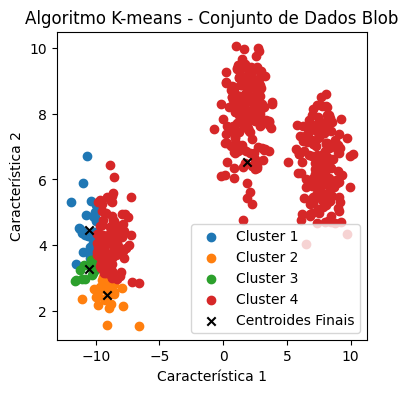

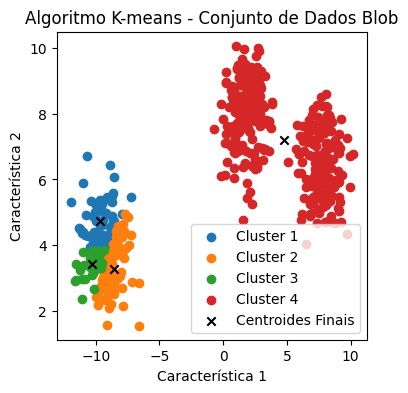

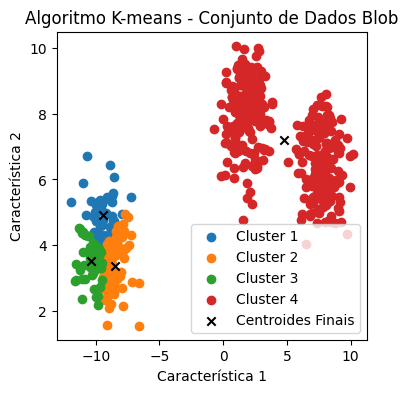

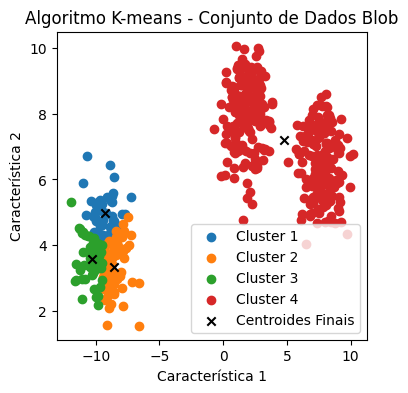

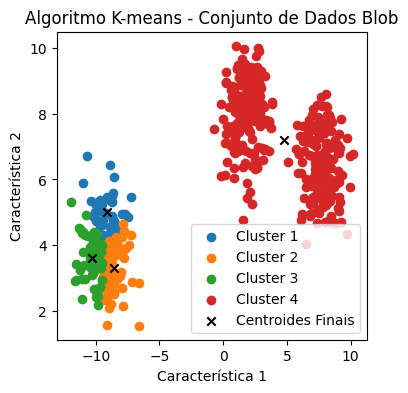

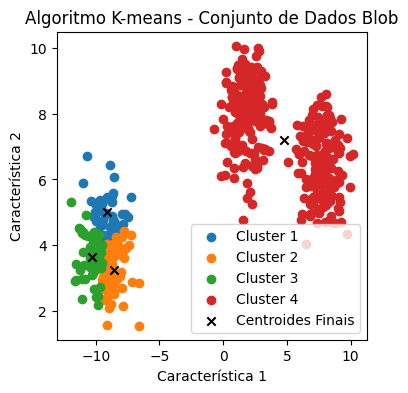

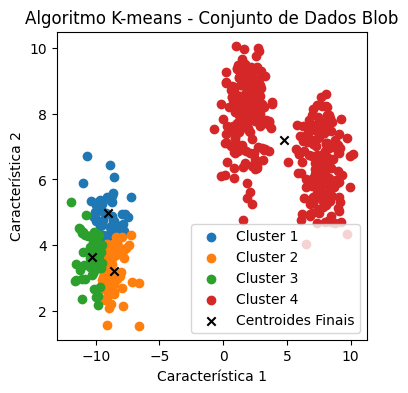

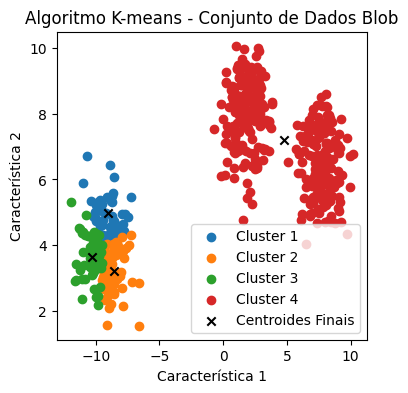

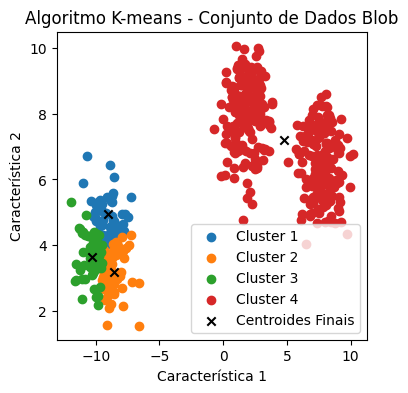

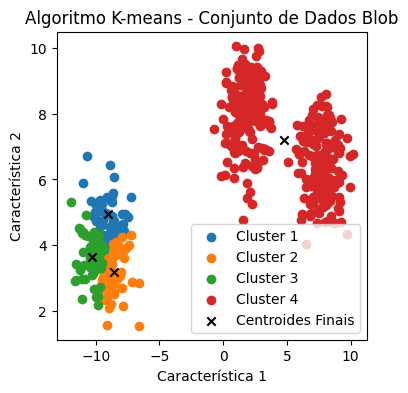

Total de iterações até convergir 11


In [13]:
if __name__ == '__main__':
    # Gerar conjunto de dados Blob
    dados, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)

    k = 4  # Número de clusters desejado
    iteracoes = 100
    kmeans = KMeans(k, iteracoes)
    kmeans.fit(dados)

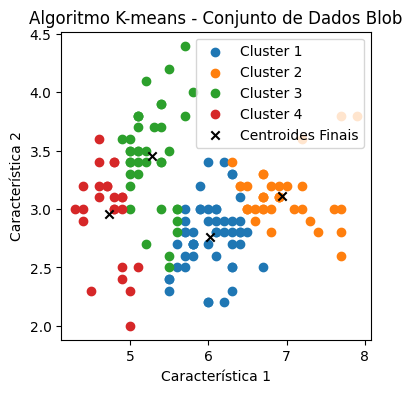

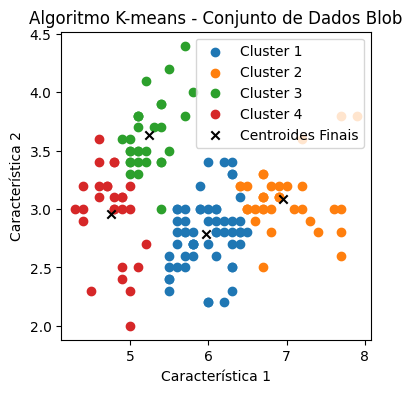

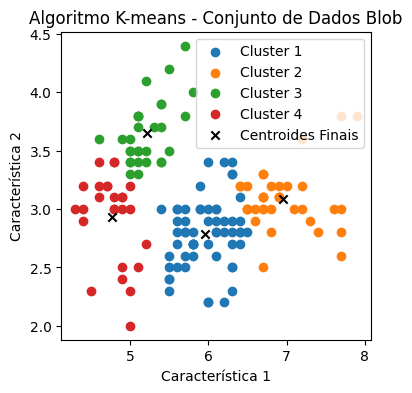

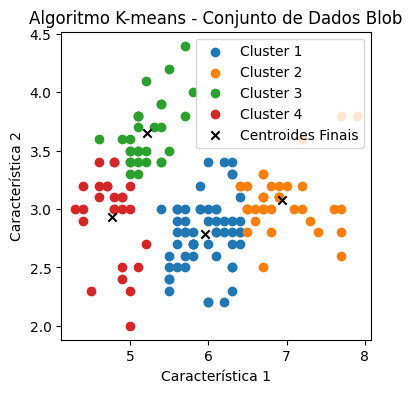

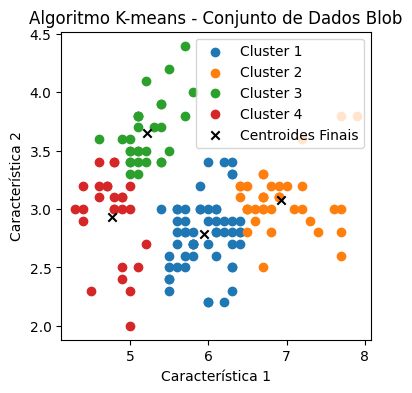

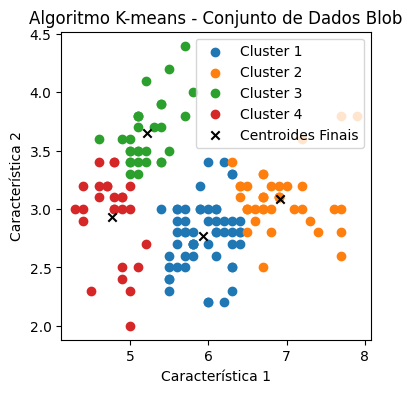

Total de iterações até convergir 7


In [14]:
from sklearn.datasets import load_iris
#--------------------------------------------------------------------------------
    # Carregar conjunto de dados Iris
iris = load_iris()
dados = iris.data[:, :2]  # Utilizar apenas as duas primeiras características

k = 4  # Número de clusters desejado
iteracoes = 100
kmeans = KMeans(k, iteracoes)
kmeans.fit(dados)